In [72]:
import pandas as pd
import seaborn as sbn
import statistics as sns
import matplotlib.pyplot as plt

In [2]:
# Dados disponíveis em:
# https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/5093679f-12c3-4d6b-b7bd-07694de54173
# Planília utilizada: Dados DF - Parte 1
# Originalmente nomeada como part-00001-0d88abe7-07f9-4dc7-b1c8-3b5e43b7b115.c000.csv

In [3]:
data=pd.read_csv('sus1.csv', sep=';', on_bad_lines='skip')
data.head()


C:\Users\matheus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,a3b9c8fd-e7e2-41ba-80fb-3a8596afcbc8-i0b0,c804ff943bec558ae80ffe5e6c1599d203aec37b154a70...,45.0,1976-02-28,F,99.0,SEM INFORMACAO,350320.0,10.0,ARARAQUARA,...,2.0,Faixa Etária,218VCD256W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-02,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,8e4ae0f4-32ae-4295-b5e6-31394a991570-i0b0,8fc7f163d8276fb6b5e7da9b27212fbbff1f7fb31ff62e...,21.0,2000-07-17,F,3.0,PARDA,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,FE3591,PFIZER,Organization/00394544000851,2021-08-12,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,a3ecb141-5ed8-4683-81a8-5935cd428501-i0b0,9edf32bb763f6903c05a89f5fab471ba81f889469bba73...,48.0,1972-08-04,M,99.0,SEM INFORMACAO,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,FA9095,PFIZER,Organization/00394544000851,2021-07-08,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
3,8e6427c0-9c08-480b-a3d9-ba0e74504a58-i0b0,c6a0d768ce158492f06085057d1431708d9321fc7ea361...,31.0,1990-01-05,F,1.0,BRANCA,260790.0,10.0,JABOATAO DOS GUARARAPES,...,2.0,Faixa Etária,FH8023,PFIZER,Organization/00394544000851,2021-10-13,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
4,a3f51e64-5581-4355-95d0-bc3dbf6f6417-i0b0,5243fb38cfdb567cd982d8b73d99ae77bc6b0612a1eb47...,41.0,1980-03-18,F,99.0,SEM INFORMACAO,290320.0,10.0,BARREIRAS,...,2.0,Faixa Etária,216VCD177Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-24,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI


In [4]:
#Verificar quais colunas possuem dados faltantes
data.isnull().sum()

document_id                                      0
paciente_id                                      1
paciente_idade                                   1
paciente_dataNascimento                          1
paciente_enumSexoBiologico                       1
paciente_racaCor_codigo                          4
paciente_racaCor_valor                           4
paciente_endereco_coIbgeMunicipio            13654
paciente_endereco_coPais                     13613
paciente_endereco_nmMunicipio                13642
paciente_endereco_nmPais                     13613
paciente_endereco_uf                         13654
paciente_endereco_cep                       259600
paciente_nacionalidade_enumNacionalidade       876
estabelecimento_valor                            0
estabelecimento_razaoSocial                      0
estalecimento_noFantasia                         0
estabelecimento_municipio_codigo                 0
estabelecimento_municipio_nome                   0
estabelecimento_uf             

In [5]:
#Verificar qual 'paciente_enumSexoBiologico' é maioria
agrupado=data.groupby(['paciente_enumSexoBiologico']).size()
agrupado

paciente_enumSexoBiologico
F    897890
M    749443
dtype: int64

In [6]:
#Substituir dado faltante na coluna 'paciente_enumSexoBiologico' pela maioria 
data['paciente_enumSexoBiologico'].fillna(value='F', inplace=True)

In [7]:
import statistics as sns

In [8]:
#Calcular moda de na coluna 'paciente_idade' utilizando a biblioteca statistics
moda_idade=sns.mode(data['paciente_idade'])
moda_idade

39.0

In [9]:
#Substituir dados faltantes na coluna 'paciente_idade' pela moda
data['paciente_idade'].fillna(moda_idade, inplace=True)
# Verificar se ainda há dados faltantes
data['paciente_idade'].isnull().sum()

0

In [10]:
#Verificando dados das colunas 'paciente_racaCor_codigo' e 'paciente_racaCor_valor'
cod_raca=data.groupby(['paciente_racaCor_codigo', 'paciente_racaCor_valor']).size()
cod_raca

paciente_racaCor_codigo  paciente_racaCor_valor
1.0                      BRANCA                    279966
2.0                      PRETA                      52455
3.0                      PARDA                     463265
4.0                      AMARELA                   180177
5.0                      INDIGENA                     668
99.0                     SEM INFORMACAO            670799
dtype: int64

In [11]:
#Calculando moda 'paciente_racaCor_codigo'
moda_cod_raca=sns.mode(data['paciente_racaCor_codigo'])
moda_cod_raca

99.0

In [12]:
#Substituindo dados falantes por moda 
data['paciente_racaCor_codigo'].fillna(moda_cod_raca, inplace=True)

In [13]:
#Calculando moda 'paciente_racaCor_valor'
moda_valor_raca=sns.mode(data['paciente_racaCor_valor'])
moda_valor_raca


'SEM INFORMACAO'

In [14]:
#Substituindo dados falantes por moda 
data['paciente_racaCor_valor'].fillna(moda_valor_raca, inplace=True)

In [15]:
#Verificando dados das colunas 'paciente_racaCor_codigo' e 'paciente_racaCor_valor'
# após substituição de dados NA
cod_raca=data.groupby(['paciente_racaCor_codigo', 'paciente_racaCor_valor']).size()
cod_raca

paciente_racaCor_codigo  paciente_racaCor_valor
1.0                      BRANCA                    279966
2.0                      PRETA                      52455
3.0                      PARDA                     463265
4.0                      AMARELA                   180177
5.0                      INDIGENA                     668
99.0                     SEM INFORMACAO            670803
dtype: int64

In [16]:
#Busca de dados duplicados pelo 'document_id'
data[data.duplicated(['document_id'], keep=False)]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem


In [17]:
#Busca de dados duplicados pelo ['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', ''paciente_racaCor_valor'']
#Busca com múltiplos critérios para evitar falsas dupicações.
data[data.duplicated(['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor'], keep=False)]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
1171,abbccaf6-e59c-49f5-bbbd-003717d0d5dc-i0b0,6e8c757678aa63e45a68b30df4e31055e6232f4dfdfeaa...,19.0,2002-03-28,M,3.0,PARDA,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,FD7222,PFIZER,Organization/00394544000851,2021-08-18,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
1766,cfebd766-d8db-4ba0-b3fc-971fa424db7f-i0b0,8618955d041c76fd6636181db0755d89cafd595c80d047...,53.0,1967-10-24,F,1.0,BRANCA,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,210373,SINOVAC/BUTANTAN,Organization/61189445000156,2021-09-10,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
3103,ddee5d54-a7dc-4b31-a48b-6f4ecc996f67-i0b0,16eee3601325b8f85dc2ce53627e32ab5cb3736c559fc0...,43.0,1978-10-13,M,99.0,SEM INFORMACAO,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,210388,SINOVAC/BUTANTAN,Organization/61189445000156,2021-10-14,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
3928,0f34c483-1764-4299-b3a6-50703cc8e51a-i0b0,c1b7686c3b3a9d3da504755054337e057047649d62cb19...,61.0,1959-11-25,F,1.0,BRANCA,530010.0,10.0,BRASILIA,...,NaN,NaN,213VCD04,ASTRAZENECA/FIOCRUZ,NaN,2021-07-01,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,ESUS APS - NACIONAL (OFFLINE)
4221,f954b026-bdb0-496d-8651-0902f985ab2b-i0b0,36db5bbd5c98a055fc3e8f15330a227381a5ac1485ceab...,22.0,1999-05-05,M,3.0,PARDA,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,210373,SINOVAC/BUTANTAN,Organization/61189445000156,2021-09-11,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730,39452adf-1d12-4030-823c-ba4526113de0-i0b0,d19c8319bf60ccf34c581669afe7522686d70ba1d3bce9...,69.0,1952-01-17,F,3.0,PARDA,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,FJ4184,PFIZER,Organization/00394544000851,2021-11-22,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
1645143,32878b87-f0e7-4bd1-90af-33f7f9f2ce9f-i0b0,2be0ca2fae099f1f435d476d0a3e494ce73aa602f6f853...,42.0,1979-03-12,M,3.0,PARDA,530010.0,10.0,BRASILIA,...,2.0,Faixa Etária,218VCD255Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-20,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1645289,52b6c464-9743-4eca-87a7-56542fe4717a-i0b0,196d14eede7c8537a5687690e82de3567906e5f0240761...,29.0,1992-05-31,F,2.0,PRETA,530010.0,10.0,BRASILIA,...,9.0,Trabalhadores de Saúde,210269,SINOVAC/BUTANTAN,Organization/61189445000156,2021-06-29,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
1646570,7d1fc91e-160b-43b2-82a3-a4b00856292b-i0b0,c74bf2e5a68575c4913ab37a8cf17657899a72ccc4ad29...,53.0,1967-10-23,F,99.0,SEM INFORMACAO,230440.0,10.0,FORTALEZA,...,1.0,Comorbidades,210121,ASTRAZENECA,Organization/00394544000851,2021-08-14,2ª Dose,89,COVID-19 ASTRAZENECA - ChAdOx1-S,Novo PNI


In [18]:
#Exclusão de duplicados identificados
data.drop_duplicates(subset=['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor'], keep='first', inplace=True)

In [19]:
#Check na exclusão
data[data.duplicated(['paciente_id', 'paciente_idade', 'vacina_descricao_dose', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor'], keep=False)]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem


In [20]:
#Verificar como está estruturado o dado
agrup_mun_ibge=data.groupby(['paciente_endereco_coIbgeMunicipio', 'paciente_endereco_nmMunicipio']).size()
agrup_mun_ibge

paciente_endereco_coIbgeMunicipio  paciente_endereco_nmMunicipio
110001.0                           ALTA FLORESTA D'OESTE            14
110002.0                           ARIQUEMES                        30
110004.0                           CACOAL                           31
110005.0                           CEREJEIRAS                        4
110006.0                           COLORADO DO OESTE                 4
                                                                    ..
539921                             SOBRADINHO                       18
539924                             TAGUATINGA                        2
999999                             INVALIDO                         87
None                               BRASILIA - DF                     1
                                   None                              9
Length: 6563, dtype: int64

In [21]:
#Calculando moda 'paciente_endereco_coIbgeMunicipio'
moda_mun_ibge=sns.mode(data['paciente_endereco_coIbgeMunicipio'])
moda_mun_ibge

530010.0

In [22]:
# substituindo NA em 'paciente_endereco_coIbgeMunicipio' por moda
data['paciente_endereco_coIbgeMunicipio'].fillna(moda_mun_ibge, inplace=True)

In [23]:
# agrup_nom_muninc=data.groupby(['paciente_endereco_nmMunicipio']).size()
# agrup_nom_muninc

In [24]:
#Tentativa 1 de substituição dos NA em 'paciente_endereco_nmMunicipio' 
# de acordo com a coluna 'paciente_endereco_coIbgeMunicipio'
# data.loc[data['paciente_endereco_coIbgeMunicipio']=='530010.0', 'paciente_endereco_nmMunicipio']='BRASILIA'

In [25]:
#Tentativa 2 de substituição dos NA em 'paciente_endereco_nmMunicipio' 
# de acordo com a coluna 'paciente_endereco_coIbgeMunicipio'
data['paciente_endereco_nmMunicipio'].fillna('paciente_endereco_coIbgeMunicipio', inplace=True)
data.loc[data['paciente_endereco_coIbgeMunicipio']==530010.0, 'paciente_endereco_nmMunicipio']='BRASILIA'

In [26]:
#Check se foi feita a substituição
data['paciente_endereco_nmMunicipio']=='paciente_endereco_coIbgeMunicipio'
len(data.loc[data['paciente_endereco_nmMunicipio']=='paciente_endereco_coIbgeMunicipio', :])

0

In [27]:
moda_cod_país=sns.mode(data['paciente_endereco_coPais'])
moda_cod_país

10.0

In [28]:
#Substituição de NA na col 'paciente_endereco_coPais' pela moda
data['paciente_endereco_coPais'].fillna(moda_cod_país, inplace=True)

In [29]:
#Substituição de NA na col 'paciente_endereço_nmPais' de acordo com a coluna 'paciente_endereço_coPais'
data['paciente_endereco_nmPais'].fillna('paciente_endereco_coPais', inplace=True)
data.loc[data['paciente_endereco_coPais']==10.0, 'paciente_endereco_nmPais']='BRASIL'

In [30]:
data['paciente_endereco_nmPais']=='paciente_endereco_coPais'
len(data.loc[data['paciente_endereco_nmPais']=='paciente_endereco_coPais', :])

0

In [31]:
#Check nos dados das colunas Pais
agrup_pais=data.groupby(['paciente_endereco_coPais', 'paciente_endereco_nmPais']).size()
agrup_pais

paciente_endereco_coPais  paciente_endereco_nmPais         
10.0                      BRASIL                               1532355
24.0                      PARAGUAI                                   1
41.0                      JAPAO                                      1
45.0                      PORTUGAL                                   1
92.0                      VENEZUELA                                  2
94.0                      ANDORRA                                    1
196.0                     GUINE EQUATORIAL                           1
221.0                     RUANDA                                     2
224.0                     SAO TOME E PRINCIPE                        2
329.0                     TIMOR LESTE                                1
356.0                     CONGO, REPUBLICA DO (BRAZZAVILLE)          1
10                        BRASIL                                113611
None                      None                                       8
dtype: int64

In [32]:
#Padronização dados col 'paciente_endereco_nmPais'
data.loc[data['paciente_endereco_nmPais']=='None', 'paciente_endereco_nmPais']='BRASIL'

In [33]:
#Padronização dados col 'paciente_endereco_coPais'
data.loc[data['paciente_endereco_coPais']=='None', 'paciente_endereco_coPais']=10.0

In [34]:
#Padronização dados col 'paciente_endereco_coPais'
# Convertendo o tipo de variável para possibilidar a padronização 
data['paciente_endereco_coPais']=data['paciente_endereco_coPais'].astype(float)

In [35]:
#Padronização dados col 'paciente_endereco_coPais'
data.loc[data['paciente_endereco_coPais']==10, 'paciente_endereco_coPais']=10.0

In [36]:
agrup_pais2=data.groupby(['paciente_endereco_coPais', 'paciente_endereco_nmPais']).size()
agrup_pais2

paciente_endereco_coPais  paciente_endereco_nmPais         
10.0                      BRASIL                               1645974
24.0                      PARAGUAI                                   1
41.0                      JAPAO                                      1
45.0                      PORTUGAL                                   1
92.0                      VENEZUELA                                  2
94.0                      ANDORRA                                    1
196.0                     GUINE EQUATORIAL                           1
221.0                     RUANDA                                     2
224.0                     SAO TOME E PRINCIPE                        2
329.0                     TIMOR LESTE                                1
356.0                     CONGO, REPUBLICA DO (BRAZZAVILLE)          1
dtype: int64

In [37]:
data['paciente_endereco_uf'].head()

0    SP
1    DF
2    DF
3    PE
4    BA
Name: paciente_endereco_uf, dtype: object

In [38]:
data['paciente_endereco_uf'].fillna('paciente_endereco_coIbgeMunicipio', inplace=True)
data.loc[data['paciente_endereco_coIbgeMunicipio']==530010.0, 'paciente_endereco_uf']='DF'

In [39]:
data['paciente_endereco_uf']=='paciente_endereco_coIbgeMunicipio'
len(data.loc[data['paciente_endereco_uf']=='paciente_endereco_coIbgeMunicipio', :])

0

In [40]:
vac_cat=data.groupby(['vacina_categoria_codigo', 'vacina_categoria_nome']).size()
vac_cat

vacina_categoria_codigo  vacina_categoria_nome                          
1.0                      Comorbidades                                        147238
2.0                      Faixa Etária                                       1244320
3.0                      Pessoas de 60 anos ou mais institucionalizadas        5023
4.0                      Forças Armadas (membros ativos)                      11482
5.0                      Forças de Segurança e Salvamento                     15971
6.0                      Povos e Comunidades Tradicionais                       198
7.0                      Povos Indígenas                                        263
8.0                      Trabalhadores da Educação                            33282
9.0                      Trabalhadores de Saúde                              129573
10.0                     Trabalhadores de Transporte                           8156
11.0                     Pessoas com Deficiência                               9808
12.

In [41]:
moda_vac_cod=sns.mode(data['vacina_categoria_codigo'])
moda_vac_cod

2.0

In [42]:
data['vacina_categoria_codigo'].fillna(moda_vac_cod, inplace=True)

In [43]:
data['vacina_categoria_nome'].fillna('vacina_categoria_codigo', inplace=True)
data.loc[data['vacina_categoria_codigo']==2.0, 'vacina_categoria_nome']='Faixa Etária'

In [44]:
agrup_vac_nome=data.groupby(['vacina_fabricante_nome']).size()
agrup_vac_nome

vacina_fabricante_nome
ASTRAZENECA                40819
ASTRAZENECA/FIOCRUZ       455843
JANSSEN                    27368
PFIZER                    774934
Pendente Identificação      4481
SINOVAC/BUTANTAN          342542
dtype: int64

In [45]:
agrup_vac_ref=data.groupby(['vacina_fabricante_referencia', 'vacina_fabricante_nome']).size()
agrup_vac_ref

vacina_fabricante_referencia  vacina_fabricante_nome
Organization/00394544000851   ASTRAZENECA                40779
                              JANSSEN                    19283
                              PFIZER                    624540
Organization/149              ASTRAZENECA/FIOCRUZ         6864
Organization/152              SINOVAC/BUTANTAN           14638
Organization/28290            PFIZER                    149968
                              Pendente Identificação      4481
Organization/29909            ASTRAZENECA                   40
Organization/30587            JANSSEN                     7965
Organization/33781055000135   ASTRAZENECA/FIOCRUZ       448444
                              SINOVAC/BUTANTAN              11
Organization/61189445000156   SINOVAC/BUTANTAN          327543
dtype: int64

In [46]:
data.loc[data['vacina_fabricante_nome']=='Pendente Identificação', 'vacina_fabricante_nome']='PFIZER'

In [47]:
# Cruzei os dados NA da col 'vacina_fabricante_referencia' com a col 'vacina_fabricante_nome'
data['vacina_fabricante_referencia'].fillna('vacina_fabricante_nome', inplace=True)

In [48]:
agrup_vac_nome=data.groupby(['vacina_fabricante_nome']).size()
agrup_vac_nome

vacina_fabricante_nome
ASTRAZENECA             40819
ASTRAZENECA/FIOCRUZ    455843
JANSSEN                 27368
PFIZER                 779415
SINOVAC/BUTANTAN       342542
dtype: int64

In [49]:
agrup_vac_ref2=data.groupby(['vacina_fabricante_referencia', 'vacina_fabricante_nome']).size()
agrup_vac_ref2

vacina_fabricante_referencia  vacina_fabricante_nome
Organization/00394544000851   ASTRAZENECA                40779
                              JANSSEN                    19283
                              PFIZER                    624540
Organization/149              ASTRAZENECA/FIOCRUZ         6864
Organization/152              SINOVAC/BUTANTAN           14638
Organization/28290            PFIZER                    154449
Organization/29909            ASTRAZENECA                   40
Organization/30587            JANSSEN                     7965
Organization/33781055000135   ASTRAZENECA/FIOCRUZ       448444
                              SINOVAC/BUTANTAN              11
Organization/61189445000156   SINOVAC/BUTANTAN          327543
vacina_fabricante_nome        ASTRAZENECA/FIOCRUZ          535
                              JANSSEN                      120
                              PFIZER                       426
                              SINOVAC/BUTANTAN             350
dt

In [50]:
#Selecionei as duas colunas ['vacina_fabricante_referencia'; 'vacina_fabricante_nome']
#Substituí as linhas onde a referência estava constando "vacina_fabricante_referencia"
# pela moda da referência, de acordo com cada nome de vacina. 
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='PFIZER'), 'vacina_fabricante_referencia']='Organization/00394544000851'
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='ASTRAZENECA/FIOCRUZ'), 'vacina_fabricante_referencia']='Organization/33781055000135'
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='JANSSEN'), 'vacina_fabricante_referencia']='Organization/30587'
data.loc[(data['vacina_fabricante_referencia']=='vacina_fabricante_nome') & (data['vacina_fabricante_nome']=='SINOVAC/BUTANTAN'), 'vacina_fabricante_referencia']='Organization/61189445000156'

In [51]:
agrup_vac_ref3=data.groupby(['vacina_fabricante_referencia', 'vacina_fabricante_nome']).size()
agrup_vac_ref3

vacina_fabricante_referencia  vacina_fabricante_nome
Organization/00394544000851   ASTRAZENECA                40779
                              JANSSEN                    19283
                              PFIZER                    624966
Organization/149              ASTRAZENECA/FIOCRUZ         6864
Organization/152              SINOVAC/BUTANTAN           14638
Organization/28290            PFIZER                    154449
Organization/29909            ASTRAZENECA                   40
Organization/30587            JANSSEN                     8085
Organization/33781055000135   ASTRAZENECA/FIOCRUZ       448979
                              SINOVAC/BUTANTAN              11
Organization/61189445000156   SINOVAC/BUTANTAN          327893
dtype: int64

In [52]:
agrup_nac=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         ANDORRA                                    1
                                          BRASIL                               1637107
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          GUINE EQUATORIAL                           1
                                          JAPAO                                      1
                                          PARAGUAI                                   1
                                          RUANDA                                     2
E                                         BRASIL                                  7908
                                          PORTUGAL                                   1
                                          SAO TOME E PRINCIPE                        2
                                          TIMOR LESTE 

In [53]:
data['paciente_nacionalidade_enumNacionalidade'].fillna('paciente_endereco_nmPais', inplace=True)

In [54]:
data.loc[(data['paciente_nacionalidade_enumNacionalidade']=='paciente_endereco_nmPais') & (data['paciente_endereco_nmPais']=='BRASIL'), 'paciente_nacionalidade_enumNacionalidade']='B'
data.loc[(data['paciente_nacionalidade_enumNacionalidade']=='paciente_endereco_nmPais') & (data['paciente_endereco_nmPais']!='BRASIL'), 'paciente_nacionalidade_enumNacionalidade']='E'

In [55]:
agrup_nac3=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac3

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         ANDORRA                                    1
                                          BRASIL                               1637983
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          GUINE EQUATORIAL                           1
                                          JAPAO                                      1
                                          PARAGUAI                                   1
                                          RUANDA                                     2
E                                         BRASIL                                  7908
                                          PORTUGAL                                   1
                                          SAO TOME E PRINCIPE                        2
                                          TIMOR LESTE 

In [56]:
#Transformei na col 'paciente_endereco_nmPais' a string 'None' em BRASIL
data.loc[data['paciente_endereco_nmPais']=='None', 'paciente_endereco_nmPais']='BRASIL'

In [57]:
#Teste para saber se pode atribuir os NA em 'paciente_nacionalidade_enumNacionalidade'
# a B (Brasileiro)
data['paciente_nacionalidade_enumNacionalidade'].fillna('teste', inplace=True)

In [58]:
agrup_nac4=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac4

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         ANDORRA                                    1
                                          BRASIL                               1637983
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          GUINE EQUATORIAL                           1
                                          JAPAO                                      1
                                          PARAGUAI                                   1
                                          RUANDA                                     2
E                                         BRASIL                                  7908
                                          PORTUGAL                                   1
                                          SAO TOME E PRINCIPE                        2
                                          TIMOR LESTE 

In [59]:
#Transformei na col 'paciente_nacionalidade_enumNacionalidade' a string 'None' em B
# OBS: Fiz isso após observação preliminar dos dados.
data.loc[data['paciente_nacionalidade_enumNacionalidade'].isin(['None','teste']), 'paciente_nacionalidade_enumNacionalidade']='B'

In [60]:
agrup_nac5=data.groupby(['paciente_nacionalidade_enumNacionalidade', 'paciente_endereco_nmPais']).size()
agrup_nac5

paciente_nacionalidade_enumNacionalidade  paciente_endereco_nmPais         
B                                         ANDORRA                                    1
                                          BRASIL                               1638008
                                          CONGO, REPUBLICA DO (BRAZZAVILLE)          1
                                          GUINE EQUATORIAL                           1
                                          JAPAO                                      1
                                          PARAGUAI                                   1
                                          RUANDA                                     2
E                                         BRASIL                                  7908
                                          PORTUGAL                                   1
                                          SAO TOME E PRINCIPE                        2
                                          TIMOR LESTE 

In [61]:
vac2=data.groupby(['vacina_codigo', 'vacina_nome']).size()
vac2

vacina_codigo  vacina_nome                              
85             COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD    455843
86             COVID-19 SINOVAC/BUTANTAN - CORONAVAC        342542
87             COVID-19 PFIZER - COMIRNATY                  774934
88             COVID-19 JANSSEN - Ad26.COV2.S                27368
89             COVID-19 ASTRAZENECA - ChAdOx1-S              40819
99             COVID-19 PEDIÁTRICA - PFIZER COMIRNATY         4481
dtype: int64

In [62]:
dose=data.groupby(['vacina_descricao_dose']).size()
dose

vacina_descricao_dose
1ª Dose                772437
1ª Dose Revacinação        11
2ª Dose                667191
2ª Dose Revacinação        27
3ª Dose                    27
3ª Dose Revacinação         1
Dose                    19465
Dose Adicional           9334
Reforço                177494
dtype: int64

In [63]:
data.dropna(subset=['paciente_id'], inplace=True)

In [64]:
data.shape

(1645986, 32)

In [65]:
Idade_Outside=data[data['paciente_idade']>=100].index

In [66]:
data=data.drop(Idade_Outside)

C:\Users\matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='paciente_idade'>

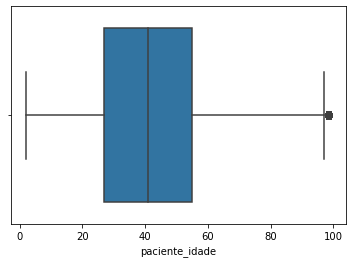

In [67]:
sbn.boxplot(data.paciente_idade)

In [69]:
data.isnull().sum()

document_id                                      0
paciente_id                                      0
paciente_idade                                   0
paciente_dataNascimento                          0
paciente_enumSexoBiologico                       0
paciente_racaCor_codigo                          0
paciente_racaCor_valor                           0
paciente_endereco_coIbgeMunicipio                0
paciente_endereco_coPais                         0
paciente_endereco_nmMunicipio                    0
paciente_endereco_nmPais                         0
paciente_endereco_uf                             0
paciente_endereco_cep                       259341
paciente_nacionalidade_enumNacionalidade         0
estabelecimento_valor                            0
estabelecimento_razaoSocial                      0
estalecimento_noFantasia                         0
estabelecimento_municipio_codigo                 0
estabelecimento_municipio_nome                   0
estabelecimento_uf             

In [70]:
data=data.drop(columns=['paciente_dataNascimento', 'paciente_racaCor_codigo', 'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais', 'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais', 'paciente_endereco_uf', 'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor', 'estabelecimento_razaoSocial', 'estalecimento_noFantasia', 'vacina_grupoAtendimento_codigo', 'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo', 'vacina_categoria_nome', 'vacina_lote', 'vacina_dataAplicacao', 'paciente_endereco_cep'])

C:\Users\matheus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequencia')

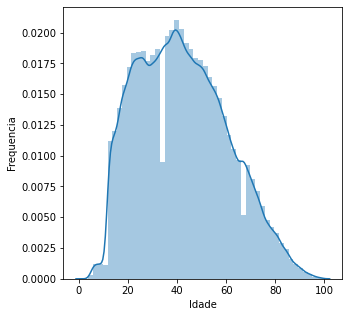

In [80]:
plt.figure(figsize=(5,5))
p=sbn.distplot(data.paciente_idade, hist=True)
p.set_xlabel('Idade')
p.set_ylabel('Frequencia')

Text(0.5, 0, '')

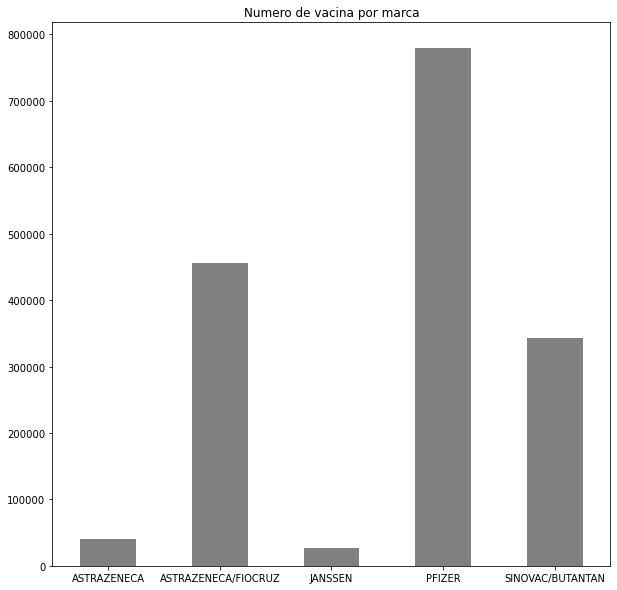

In [81]:
agrupado_vac=data.groupby(['vacina_fabricante_nome']).size()
plt.figure(figsize=(10,10))
agrupado_vac.plot.bar(color='gray')
plt.xticks(rotation=0)
plt.title('Numero de vacina por marca')
plt.xlabel('')

In [82]:
data['grupo_idade']='paciente_idade'

In [83]:
data['grupo_idade']=data['paciente_idade'].apply(lambda y: 'Adolescente'if y<=20 else
                                                           'Jovem_adulto'if y>20 and y<=40 else
                                                           'Adulto' if y>40 and y<60 else
                                                           'Idoso' if y>=60 else 'NA' )

In [85]:
agrupado_id_vac=data.groupby([ data['vacina_fabricante_nome']])

In [86]:
agrupado_id=data.groupby(['grupo_idade']).size()

Text(0.5, 0, '')

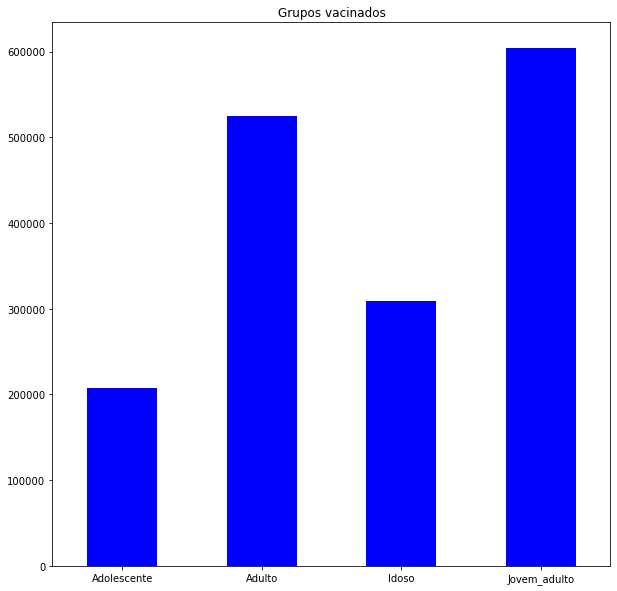

In [87]:
plt.figure(figsize=(10,10))
agrupado_id.plot.bar(color='blue')
plt.xticks(rotation=0)
plt.title('Grupos vacinados')
plt.xlabel('')

vacina_fabricante_nome
ASTRAZENECA            [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ASTRAZENECA/FIOCRUZ    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
JANSSEN                [[AxesSubplot(0.125,0.125;0.775x0.755)]]
PFIZER                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SINOVAC/BUTANTAN       [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

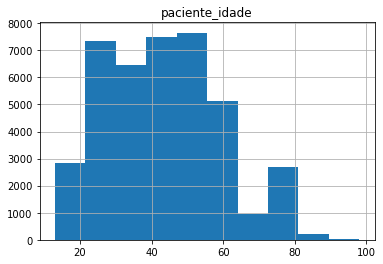

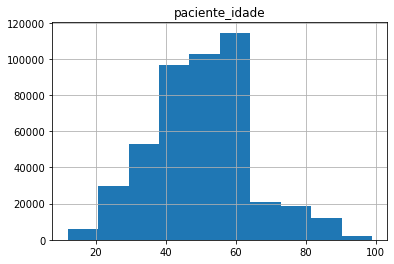

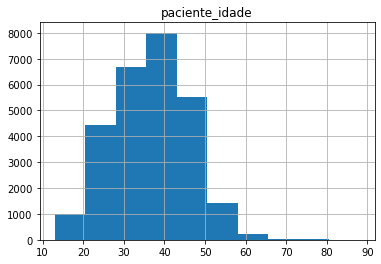

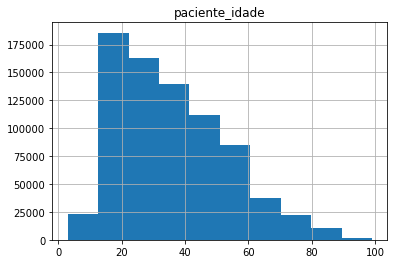

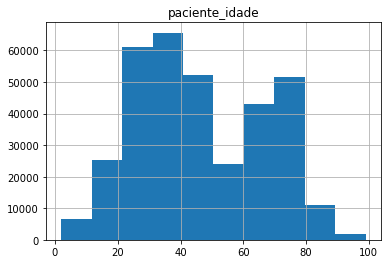

In [92]:
col_vac_age = ["vacina_fabricante_nome", 'paciente_idade' ]
dados_vac_age = data.filter(items=col_vac_age)
dados_vac_age.groupby('vacina_fabricante_nome').hist()

In [ ]:
data.to_csv('sus1trat.csv')